# WeatherPy
----

#### Note
* Linear Regression plot between Max Temp and Latitude indicates that the maximum temperature increases as we get closer to the equator and decreases as we go away from the equator for both hemispheres
* Linear Regression plot between Humidity and Latitude indicates that the humidity tends to be a little higher near the equators but stays close to constant over the rest of the hemispheres
* Linear Regression plot between Cloudiness and Latitude indicates that there is little to no relationship between the two variables. Cloudiness tends to occur at all levels across all latitudes.
* Linear Regression plot between Wind Speed and Latitude indicates that there is little to no relationship between the two variables. Wind Speed appears at all levels across all latitudes.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import sys
%matplotlib inline
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set-up the base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Initialize the lists
city_name=[]
lat=[]
lng=[]
max_temp=[]
clouds=[]
humidity=[]
wind=[]
country=[]
date=[]


# Save the requested parameters frm the API response to a .csv file with UTF-8 encoding
with open(output_data_file, "w", newline='', encoding='utf8') as datafile:
    writer = csv.writer(datafile)
    
    # Write the header of the .csv file
    writer.writerow(["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
    for city in cities:
        try:
            query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
            response = requests.get(query_url)         
           
            # Convert into a json
            weather_response = response.json()

            writer.writerow([weather_response['name'], weather_response['coord']['lat'], weather_response['coord']['lon'], weather_response['main']['temp_max'], weather_response['main']['humidity'], weather_response['clouds']['all'], weather_response['wind']['speed'], weather_response['sys']['country'], weather_response['dt']])
            city_name.append(weather_response['name'])
            lat.append(weather_response['coord']['lat']) 
            lng.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            clouds.append(weather_response['clouds']['all'])
            humidity.append(weather_response['main']['humidity']) 
            wind.append(weather_response['wind']['speed'])
            country.append(weather_response['sys']['country'])
            date.append(weather_response['dt'])
            print(f"Processing Record {cities.index(city)} | {city}")
        except(KeyError, IndexError):
            print("Missing field/result......skipping.")


Processing Record 0 | uvat
Processing Record 1 | vrangel
Processing Record 2 | hilo
Processing Record 3 | mataura
Processing Record 4 | puerto ayora
Processing Record 5 | verkhniy rohachyk
Processing Record 6 | kose
Missing field/result......skipping.
Processing Record 8 | wodonga
Processing Record 9 | ushuaia
Missing field/result......skipping.
Processing Record 11 | rikitea
Missing field/result......skipping.
Processing Record 13 | bulgan
Processing Record 14 | vanimo
Processing Record 15 | hermanus
Processing Record 16 | kapaa
Processing Record 17 | los llanos de aridane
Processing Record 18 | plettenberg bay
Processing Record 19 | andenes
Processing Record 20 | touros
Processing Record 21 | arraial do cabo
Processing Record 22 | atuona
Processing Record 23 | cidreira
Processing Record 24 | shieli
Processing Record 25 | monte alegre
Processing Record 26 | bluff
Missing field/result......skipping.
Processing Record 28 | lebu
Processing Record 29 | punta arenas
Processing Record 30 | 

Missing field/result......skipping.
Processing Record 252 | saint-joseph
Missing field/result......skipping.
Processing Record 254 | samarai
Processing Record 255 | sambava
Processing Record 256 | erdenet
Processing Record 257 | gabu
Processing Record 258 | ternate
Processing Record 259 | thai binh
Processing Record 260 | linguere
Processing Record 261 | bethel
Processing Record 262 | pangnirtung
Processing Record 263 | skibbereen
Processing Record 264 | narrabri
Processing Record 265 | keti bandar
Processing Record 266 | blagoyevo
Missing field/result......skipping.
Processing Record 268 | auki
Missing field/result......skipping.
Processing Record 270 | cleethorpes
Processing Record 271 | cherkasskoye
Processing Record 272 | isangel
Processing Record 273 | cedar city
Processing Record 274 | san jose
Processing Record 275 | paita
Missing field/result......skipping.
Processing Record 277 | florianopolis
Missing field/result......skipping.
Processing Record 279 | teknaf
Processing Record

Processing Record 492 | avera
Processing Record 493 | kasane
Processing Record 494 | piojo
Processing Record 495 | tornio
Missing field/result......skipping.
Processing Record 497 | garmsar
Processing Record 498 | naryan-mar
Processing Record 499 | maldonado
Processing Record 500 | fez
Processing Record 501 | kattivakkam
Missing field/result......skipping.
Processing Record 503 | akdepe
Processing Record 504 | kamenka
Processing Record 505 | barcelos
Processing Record 506 | urumqi
Processing Record 507 | karwar
Processing Record 508 | nanortalik
Processing Record 509 | giyani
Processing Record 510 | namatanai
Processing Record 511 | flin flon
Processing Record 512 | lata
Missing field/result......skipping.
Processing Record 514 | vytegra
Processing Record 515 | hofn
Processing Record 516 | denpasar
Processing Record 517 | kenai
Processing Record 518 | ust-nera
Processing Record 519 | suhbaatar
Processing Record 520 | pacific grove
Processing Record 521 | rayadrug
Processing Record 522 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Print the length of each column to verify that all of them are populated
print(f"City {len(city_name)}")
print(f"Latitude {len(lat)}")
print(f"Longitude {len(lng)}")
print(f"Max Temp {len(max_temp)}")
print(f"Cloudiness {len(clouds)}")
print(f"Humidity {len(humidity)}")
print(f"Wind Speed {len(wind)}")
print(f"Country {len(country)}")
print(f"Date {len(date)}")

City 585
Latitude 585
Longitude 585
Max Temp 585
Cloudiness 585
Humidity 585
Wind Speed 585
Country 585
Date 585


In [7]:
# Read the .csv file with the weather data from the API
weather_csv_path = "output_data/cities.csv"
weather_df = pd.read_csv(weather_csv_path)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uvat,59.14,68.90,49.42,83,0,4.76,RU,1595463959
1,Vrangel',42.73,133.08,66.96,84,71,13.02,RU,1595463959
2,Hilo,19.73,-155.09,84.20,58,1,10.29,US,1595463950
3,Mataura,-46.19,168.86,39.00,83,97,3.00,NZ,1595463789
4,Puerto Ayora,-0.74,-90.35,68.00,94,85,7.00,EC,1595463960
...,...,...,...,...,...,...,...,...,...
580,Linhares,-19.39,-40.07,65.84,81,0,3.00,BR,1595464021
581,Mbandaka,0.05,18.26,72.48,75,98,2.66,CD,1595464021
582,Hailey,43.52,-114.32,73.40,53,90,5.82,US,1595464022
583,San Andrés,12.58,-81.70,84.20,79,90,8.05,CO,1595464022


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Describe the data frame to verify whether Humidity is > 100%
summary_df = weather_df.describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,19.550940,18.560991,68.704564,72.914530,53.025641,7.370923,1.595464e+09
std,33.532928,93.262691,13.345557,18.574255,37.138316,5.122324,6.799589e+01
min,-54.800000,-175.200000,14.000000,6.000000,0.000000,0.340000,1.595464e+09
25%,-8.140000,-63.000000,59.000000,64.000000,18.000000,3.360000,1.595464e+09
50%,22.080000,20.430000,70.290000,76.000000,62.000000,6.400000,1.595464e+09
75%,48.400000,107.030000,78.820000,87.000000,90.000000,9.820000,1.595464e+09
max,78.220000,179.320000,102.400000,100.000000,100.000000,34.450000,1.595464e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

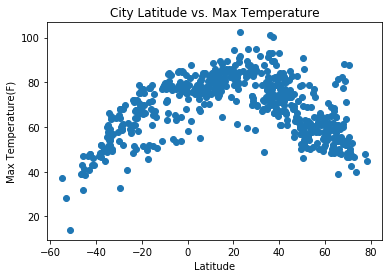

In [13]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Max Temp"]

plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title("City Latitude vs. Max Temperature")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsTemp.png") 
plt.show()

## Latitude vs. Humidity Plot

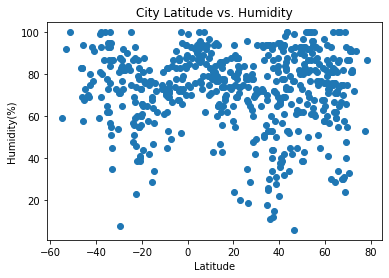

In [14]:
# Setup the x and y values and labels for the scatter plot and plot it

x_value = weather_df["Lat"]
y_value = weather_df["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

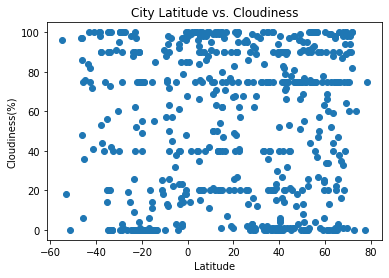

In [15]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

plt.scatter(x_value, y_value)
#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

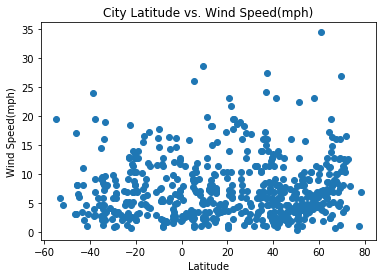

In [16]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed(mph)")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsWindSpeed.png") 
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x_val,y_val):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [18]:
# Create Northern Hemisphere DataFrame
northern_data_df = weather_df.loc[(weather_df["Lat"] >= 0)]
northern_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uvat,59.14,68.90,49.42,83,0,4.76,RU,1595463959
1,Vrangel',42.73,133.08,66.96,84,71,13.02,RU,1595463959
2,Hilo,19.73,-155.09,84.20,58,1,10.29,US,1595463950
5,Verkhniy Rohachyk,47.25,34.34,64.69,61,12,7.36,UA,1595463960
6,Köse,40.21,39.65,60.80,67,4,1.12,TR,1595463960
...,...,...,...,...,...,...,...,...,...
579,Chara,56.91,118.26,64.62,51,47,2.10,RU,1595464021
581,Mbandaka,0.05,18.26,72.48,75,98,2.66,CD,1595464021
582,Hailey,43.52,-114.32,73.40,53,90,5.82,US,1595464022
583,San Andrés,12.58,-81.70,84.20,79,90,8.05,CO,1595464022


In [19]:
# Create Southern Hemisphere DataFrame
southern_data_df = weather_df.loc[(weather_df["Lat"] < 0)]
southern_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Mataura,-46.19,168.86,39.00,83,97,3.00,NZ,1595463789
4,Puerto Ayora,-0.74,-90.35,68.00,94,85,7.00,EC,1595463960
7,Wodonga,-36.12,146.88,44.60,100,75,4.70,AU,1595463960
8,Ushuaia,-54.80,-68.30,37.40,59,96,19.46,AR,1595463777
9,Rikitea,-23.12,-134.97,67.08,59,100,12.88,PF,1595463960
...,...,...,...,...,...,...,...,...,...
564,Farafangana,-22.82,47.83,63.88,67,62,5.17,MG,1595464020
566,Padang,-0.95,100.35,76.84,84,96,6.24,ID,1595464020
567,Mozarlândia,-14.74,-50.57,74.62,34,0,4.21,BR,1595464020
571,Tingi,-11.30,35.03,53.69,75,25,2.82,TZ,1595464020


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4285391934123168


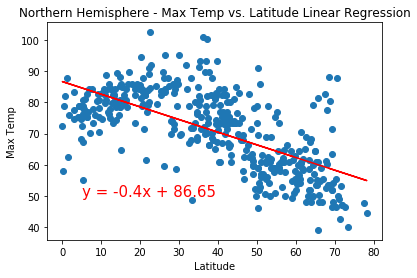

In [20]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Max Temp"]
a = 5
b = 50


title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temp"

# Call the function
lin_reg(x_val,y_val)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6271445119007844


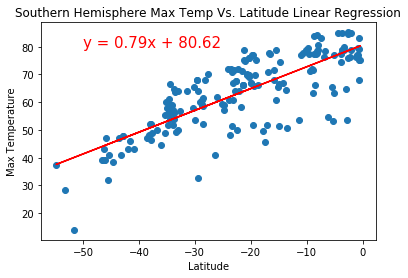

In [21]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Max Temp"]
a = -50
b = 80

title = "Southern Hemisphere Max Temp Vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"

# Invoke function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01453502797624407


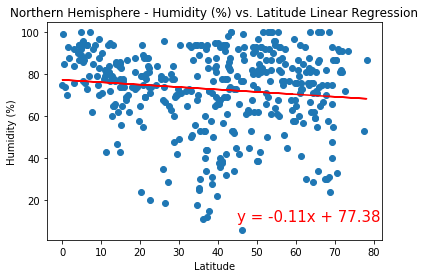

In [22]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Humidity"]
a = 45
b = 10
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = 'Latitude'
ylabel = 'Humidity (%)'

# Invoke function
lin_reg(x_val,y_val)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006016013307167347


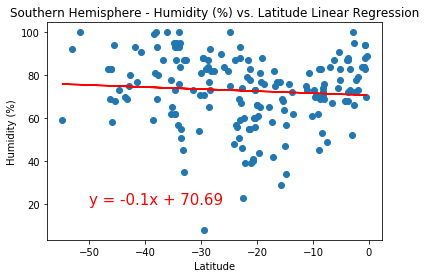

In [23]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Humidity"]
a = -50
b = 20
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009320392489376212


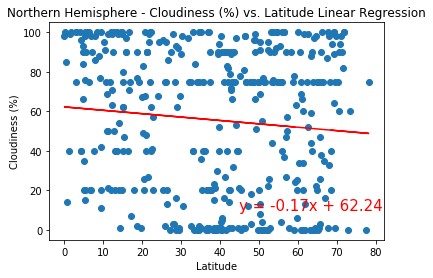

In [24]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Cloudiness"]
a = 45
b = 10
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01563590184270183


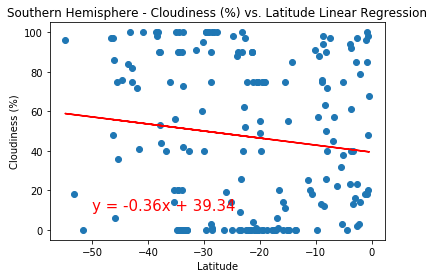

In [25]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Cloudiness"]
a = -50
b = 10
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0023938769387670316


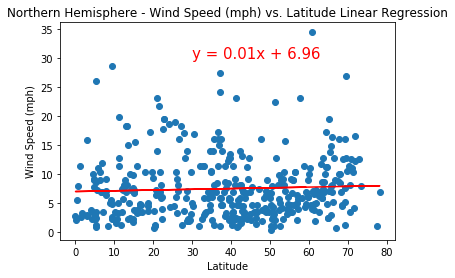

In [26]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Wind Speed"]
a = 30
b = 30
xlabel = 'Latitude'
ylabel = 'Wind Speed (mph)'
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0022746308122183288


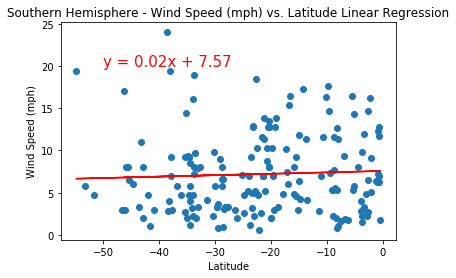

In [27]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Wind Speed"]
a = -50
b = 20
xlabel = 'Latitude'
ylabel = 'Wind Speed (mph)'
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)